In [1]:
using Pkg
Pkg.activate(".")
using PlotlyJS

WebIO._IJuliaInit()

  Activating environment at `~/Dropbox/Upwork/Plotly/Curvature2D.jl/Project.toml`


In [2]:
function kappa(s::Float64, formula::String)
    ex = quote
        s = $s
        s
    end
    ex.args[4] = Meta.parse(formula::String)
    eval(ex)
end

function kappa_field_from_formula(κ_formula)
    function f(q,s)
        x = q[1]
        y = q[2]
        tx = q[3]
        ty = q[4]
        κ_val = kappa(s,κ_formula)
        [tx,ty,-κ_val*ty,κ_val*tx]
    end
    f
end

# Data used for curve construction from curvature function
mutable struct CurveData
    κ_formula::String
    # Initial position
    x0::Float64 
    y0::Float64
    # Initial velocity (orientation!)
    tx0::Float64
    ty0::Float64
    # length of curve
    smin::Float64
    smax::Float64
end 

# Obtain curve by integrating differential equation using RK4
function curve_from_curvature(cd::CurveData; n = 1000)
    f = kappa_field_from_formula(cd.κ_formula)
    h = (cd.smax-cd.smin)/n # length step
    k1 = zeros(4)
    k2 = zeros(4)
    k3 = zeros(4)
    k4 = zeros(4)
    # Setting Initial conditions
    qs = [zeros(4) for i = 1:(n+1)]
    qs[1] = [cd.x0,cd.y0,cd.tx0,cd.ty0]
    s = cd.smin
    for i = 2:(n+1)
        q = qs[i-1]
        k1 = f(q,s)
        k2 = f(q + (h/2.0)*k1,s)
        k3 = f(q + (h/2.0)*k2,s)
        k4 = f(q + h*k3,s)
        qs[i] = q + (h/6.0)*(k1 + 2*k2 +2*k3 + k4)
        s = s + h
    end
    qs
end

curve_from_curvature (generic function with 1 method)

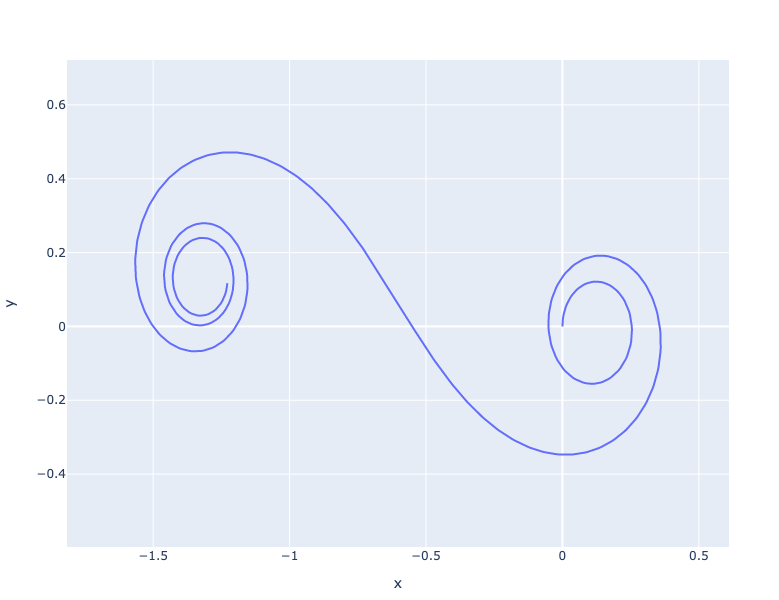

In [56]:
cd = CurveData("1.0+1.5*sin((3/4)*pi*s)",0,0,0,1,-5*3.1416,20*3.1416)
κ_formula = "3s+1"
s_min = -3.1416
s_max = 3.1416
cd = CurveData(κ_formula,0,0,0,1,s_min,s_max)

sol = curve_from_curvature(cd,n=600)

function plot_solution(sol)
    x = [q[1] for q in sol]
    y = [q[2] for q in sol]
    min_x = minimum(x)
    max_x = maximum(x)
    min_y = minimum(y)
    max_y = maximum(y)
    ϵ = 0.25
    layout = Layout(xaxis_title="x", yaxis_title="y",
    xaxis_range=[min_x-ϵ,max_x+ϵ],yaxis_range=[min_y-ϵ,max_y+ϵ],
    width=600, height=600)
    plot_data =[scatter(;x=x, y=y, mode="lines", name="Solution")] 
    plot(plot_data, layout)
end 


plot_solution(sol)

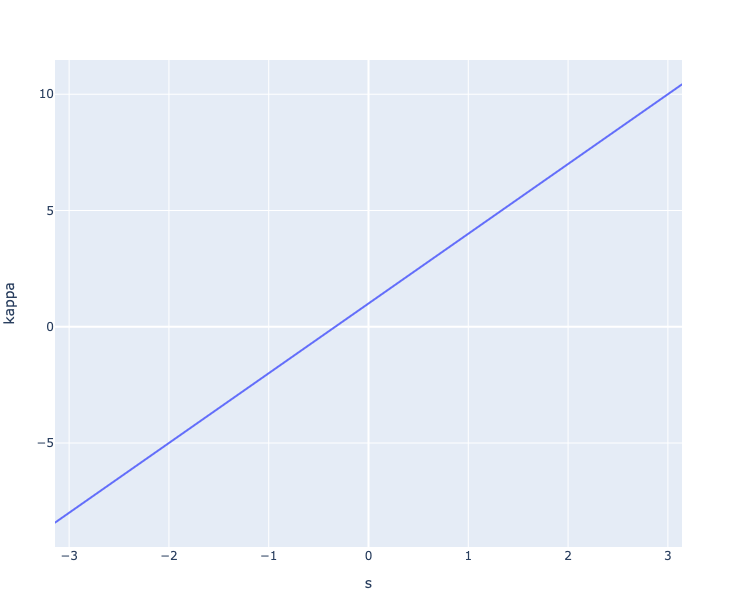

In [63]:
function plot_κ(s_min,s_max, κ_formula)
    ss = LinRange(s_min,s_max, 500)
    κs = kappa.(ss,κ_formula)
    layout = Layout(xaxis_title="s", yaxis_title="kappa",
    xaxis_range=[s_min,s_max],
    width=600, height=600)
    plot_data =[scatter(;x=ss, y=κs, mode="lines", name="")] 
    plot(plot_data, layout)
end

plot_κ(s_min,s_max,κ_formula)

In [5]:
function example(a::Float64, b::Float64)
    return "$a*x + $b"
end
example(1.0,2.0)

"1.0*x + 2.0"

In [6]:
a = ["a","b"]

2-element Vector{String}:
 "a"
 "b"

In [7]:
a::Vector{String}

2-element Vector{String}:
 "a"
 "b"

In [8]:
a = "$z"

LoadError: UndefVarError: z not defined

In [10]:
function f(x)
    return 2x
end
f

f (generic function with 1 method)

In [15]:
f::Float64

LoadError: TypeError: in typeassert, expected Float64, got a value of type typeof(f)

In [16]:
3.0::Float64

3.0

In [17]:
f(a,b) = "$a*s+$b"

f (generic function with 2 methods)

In [37]:
f(a,b) = "$a*x+$b"
p = ["a","b"]
f(p...)

"a*x+b"

In [25]:
ms = collect(methods(f))
method_argnames(last(ms))[2:end]

LoadError: UndefVarError: method_argnames not defined

In [38]:
[1.0,2.0]

2-element Vector{Float64}:
 1.0
 2.0

In [40]:
Dict("a"=>[-1.0,1.0],"b"=>[-1.0,1.0])

Dict{String, Vector{Float64}} with 2 entries:
  "b" => [-1.0, 1.0]
  "a" => [-1.0, 1.0]

In [41]:
Dict("Circle"=>[1.0,0.0],"sminmax"=>[-3.14116,3.1416])

Dict{String, Vector{Float64}} with 2 entries:
  "sminmax" => [-3.14116, 3.1416]
  "Circle"  => [1.0, 0.0]

In [42]:
[[0.0,1.0],[-3.1416,3.1416],150]

3-element Vector{Any}:
    [0.0, 1.0]
    [-3.1416, 3.1416]
 150